<a href="https://colab.research.google.com/github/barish-bit/Neural_Network-based_Climate_Data_Forecasting/blob/main/Normalized_value_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-beats

In [ ]:
# import libraries
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
X, y = prep_time_series(d, lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)

#print(X_train)

#nbeats = NBeatsModel(model_type = 'generic', lookback = 3, horizon = 1, batch_size=1024)

nbeats=NBeatsModel( model_type = 'generic', lookback = 3, horizon = 1,
                   num_generic_neurons = 256, num_generic_stacks = 15, num_generic_layers = 3,
                    num_trend_neurons = 256, num_trend_stacks = 3, num_trend_layers = 4, num_seasonal_neurons= 4096,
                    num_seasonal_stacks = 3, num_seasonal_layers= 4, num_harmonics= 1, polynomial_term= 2,
                    loss = 'mae', learning_rate= 0.001, batch_size = 1024)

nbeats.fit(X, y, epochs = 10, validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 34s 710ms/step - loss: 0.3954 - mae: 0.3954 - mape: 85632.2500 - val_loss: 0.0616 - val_mae: 0.0616 - val_mape: 15.4070
Epoch 2/10
9/9 [==============================] - 5s 570ms/step - loss: 0.0593 - mae: 0.0593 - mape: 25227.6270 - val_loss: 0.0407 - val_mae: 0.0407 - val_mape: 10.0667
Epoch 3/10
9/9 [==============================] - 4s 376ms/step - loss: 0.0320 - mae: 0.0320 - mape: 18778.3379 - val_loss: 0.0437 - val_mae: 0.0437 - val_mape: 10.8471
Epoch 4/10
9/9 [==============================] - 2s 259ms/step - loss: 0.0303 - mae: 0.0303 - mape: 22653.3926 - val_loss: 0.0399 - val_mae: 0.0399 - val_mape: 9.8202
Epoch 5/10
9/9 [==============================] - 2s 271ms/step - loss: 0.0287 - mae: 0.0287 - mape: 21245.4766 - val_loss: 0.0392 - val_mae: 0.0392 - val_mape: 9.5900
Epoch 6/10
9/9 [==============================] - 3s 371ms/step - loss: 0.0283 - mae: 0.0283 - mape: 21120.9609 - val_loss: 0.0390 - val_mae: 0.0390 - val_m

In [ ]:
nbeats.evaluate(X_test, y_test)

32/32 [==============================] - 0s 11ms/step - loss: 0.0389 - mae: 0.0389 - mape: 9.4307


[0.03894517943263054, 0.03894517943263054, 9.430693626403809]

In [ ]:
df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()

,Mean_temp,norm
Dates,,
1994-01-01,18.4250,0.257635
1994-01-02,19.6250,0.290093
1994-01-03,20.6000,0.316465
1994-01-04,20.7625,0.320860
1994-01-05,20.1750,0.304969


32/32 [==============================] - 1s 22ms/step
[[0.4882488548755646], [0.5503193140029907], [0.5640499591827393], [0.5659040808677673], [0.5657747387886047], [0.5561903715133667], [0.5705312490463257], [0.5863423347473145], [0.5218896269798279], [0.4663020670413971], [0.48464810848236084], [0.5353699326515198], [0.5478848218917847], [0.5875712037086487], [0.5793923735618591], [0.5726708173751831], [0.5507066249847412], [0.48613241314888], [0.4706273376941681], [0.46223336458206177], [0.49181467294692993], [0.5102507472038269], [0.45839136838912964], [0.4421946108341217], [0.46392858028411865], [0.4862174689769745], [0.47979745268821716], [0.48093560338020325], [0.5086339116096497], [0.4914199709892273], [0.4970991015434265], [0.5030722618103027], [0.4962059259414673], [0.4462343156337738], [0.37021464109420776], [0.385587215423584], [0.44178858399391174], [0.48741841316223145], [0.4990042448043823], [0.5141461491584778], [0.5087118744850159], [0.4897059500217438], [0.50094223022

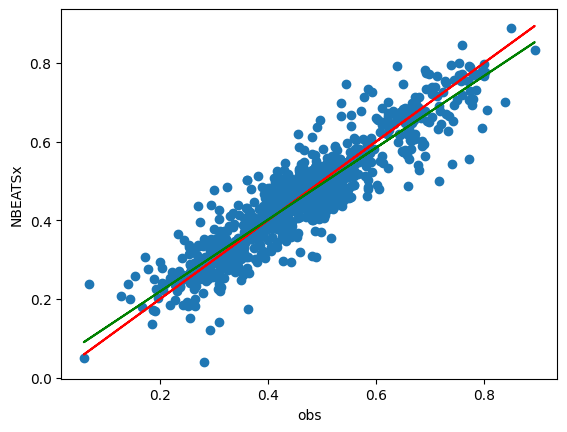

[-0.06556425358596618, -0.01701792409130054, -0.004977795115646666, -0.0034617766714377662, 0.006551978473970155, -0.01723272491566641, -0.018782699701200833, 0.06126800175539915, 0.051926122241410466, -0.021242806219608723, -0.05395035414231486, -0.015738349883458902, -0.043119643059837065, 0.0033288035734073684, 0.002588244724636146, 0.01750529595037631, 0.06147123551964073, 0.01211166952063436, 0.005397278327216926, -0.033425986458600176, -0.021426046616320304, 0.047725513763427596, 0.011418884026404452, -0.025064067977743743, -0.026321118903439356, 0.0020536281241587684, -0.005380697887055752, -0.0314598580809996, 0.014326973532263754, -0.009310928663719631, -0.010731966166719231, 0.0040318783614508025, 0.0465286156521898, 0.07263023452877326, -0.018604085847648277, -0.05935664949422714, -0.04879921843446511, -0.015341105935629873, -0.018631816889514874, 0.0022578425585035866, 0.015757349370906115, -0.014405982039393028, 0.06681766901300645, -0.05652617133793092, -0.020773806248310

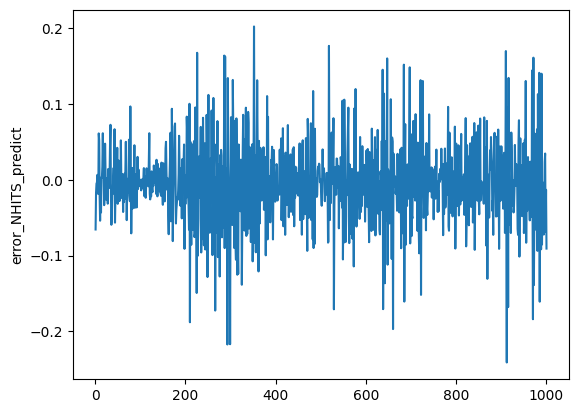

max_error 0.20242175432744736
min_error -0.2411016273209926
sd_error 0.05372681543292311
error
median -0.003742018612951148
25_parcentile -0.03083666390906331
75_parcentile 0.022995919097797773
mae 0.038945179341818015
mse 0.002901634392735612
var_obs 0.017198726031830026
var_exp_pred 0.01708892922128831
var_error 0.002886570696563385
co_variance 0.01571625853681429
co_variance_matrix [[0.01721594 0.01571626]
 [0.01571626 0.01710604]]
[15, 292, 559, 127, 7]
[5, 240, 498, 105, 2]
1000
[0.3333333333333333, 0.821917808219178, 0.8908765652951699, 0.8267716535433071, 0.2857142857142857]


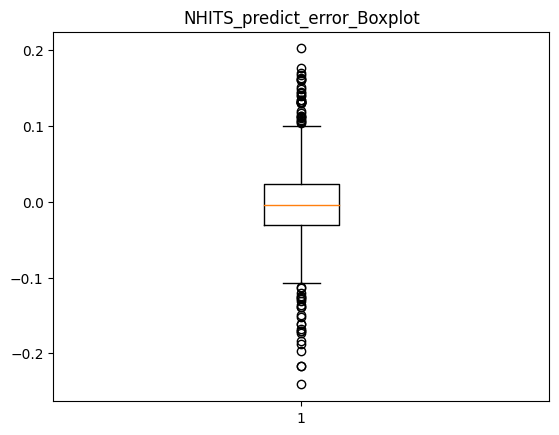

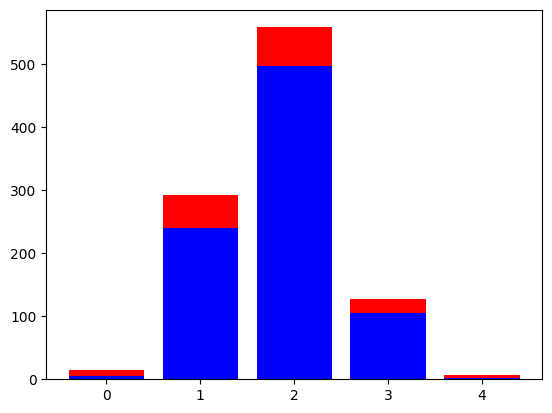

value of proportion of explained variable: 0.832163691007046
value of correlation (skill score): 0.9167345507081193


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

forecasts=nbeats.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





#df=pd.read_csv('/content/deep3.csv')
df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


###############


list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)

plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()




#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.43410552208022934


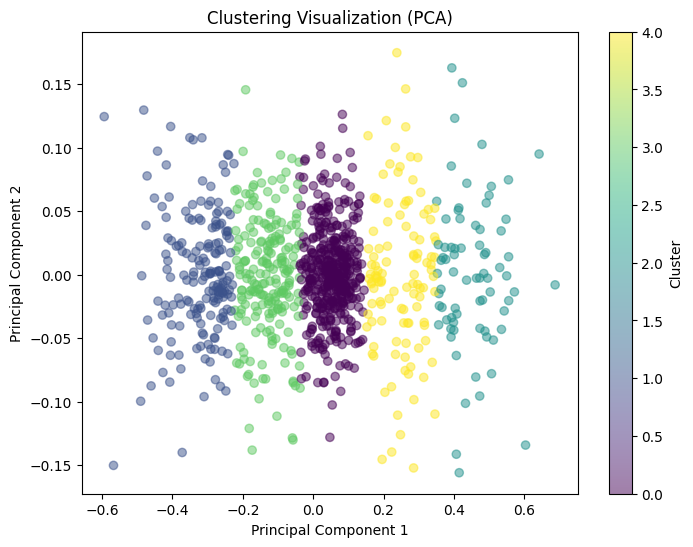

In [ ]:
X_tlist=[]
for i in range (len(X_test)):
  X_tlist.append([])
for i in range (len(X_test)):
  for j in range (3):
    X_tlist[i].append(X_test[i][j][0])

#print(X_tlist)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



X = np.array(X_tlist)
y = np.array(exp_pred)

# Reshape X to fit KMeans input format
X = X.reshape(len(X), -1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Visualize clustered data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
X, y = prep_time_series(d, lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(400, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

model.fit(X_train,y_train,epochs=10, validation_data=(X_test,y_test), batch_size=1024)
model.evaluate(X_test,y_test)

Epoch 1/10
8/8 [==============================] - 5s 320ms/step - loss: 0.4106 - val_loss: 0.3146
Epoch 2/10
8/8 [==============================] - 4s 472ms/step - loss: 0.2524 - val_loss: 0.1130
Epoch 3/10
8/8 [==============================] - 5s 581ms/step - loss: 0.0892 - val_loss: 0.1102
Epoch 4/10
8/8 [==============================] - 4s 540ms/step - loss: 0.0696 - val_loss: 0.0682
Epoch 5/10
8/8 [==============================] - 4s 515ms/step - loss: 0.0646 - val_loss: 0.0546
Epoch 6/10
8/8 [==============================] - 5s 616ms/step - loss: 0.0541 - val_loss: 0.0523
Epoch 7/10
8/8 [==============================] - 4s 516ms/step - loss: 0.0491 - val_loss: 0.0497
Epoch 8/10
8/8 [==============================] - 4s 510ms/step - loss: 0.0450 - val_loss: 0.0469
Epoch 9/10
8/8 [==============================] - 5s 641ms/step - loss: 0.0408 - val_loss: 0.0447
Epoch 10/10
32/32 [==============================] - 1s 15ms/step - loss: 0.0426


0.042633187025785446

32/32 [==============================] - 0s 8ms/step
[[0.5426268577575684], [0.5340951681137085], [0.5225323438644409], [0.5552694797515869], [0.5620853900909424], [0.5611270666122437], [0.5609163641929626], [0.5632171630859375], [0.5627586245536804], [0.5415370464324951], [0.4995555281639099], [0.4887752830982208], [0.5134343504905701], [0.5475382804870605], [0.5636323094367981], [0.5788894891738892], [0.5696247816085815], [0.547934889793396], [0.5162947773933411], [0.4805857837200165], [0.4766843318939209], [0.4844335913658142], [0.4940847158432007], [0.48488831520080566], [0.46139729022979736], [0.4642080068588257], [0.47866082191467285], [0.48744654655456543], [0.4898340702056885], [0.49477601051330566], [0.5030860900878906], [0.49799811840057373], [0.501349151134491], [0.49326521158218384], [0.46190643310546875], [0.4215177297592163], [0.40221238136291504], [0.4322783350944519], [0.4720567762851715], [0.4986422061920166], [0.5073505640029907], [0.5090765953063965], [0.503075718879

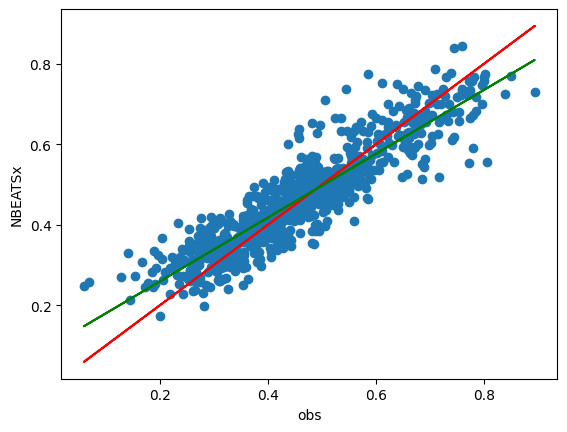

[-0.011186250703962397, -0.03324206998058277, -0.046495410433945006, -0.014096377787618186, 0.0028626297763078012, -0.012296029816789456, -0.02839758455456387, 0.038142830094022195, 0.092795119815263, 0.0539921731714893, -0.03904293446076579, -0.06233299943675785, -0.07757011446105166, -0.036704119648180766, -0.013171819400424889, 0.023723967749082364, 0.08038939214348106, 0.07391414616515035, 0.0510647180263899, -0.015073567320645465, -0.03655638766932934, 0.0219083579254149, 0.0471122314804755, 0.017629636388940217, -0.028852408957760645, -0.019955833993990035, -0.0065173286606000636, -0.02494891490663742, -0.004472867871697428, -0.005954889139641262, -0.00474497762225512, -0.0010422650482782014, 0.05167184084521348, 0.1196611304771833, 0.07308770616361271, -0.02342613515859482, -0.08837542106546181, -0.07048118400340941, -0.04557928540872569, -0.013246100407957595, 0.014396038888880969, 0.004964663245259682, 0.06895115766809679, -0.0016360751503393667, -0.024936594639424214, -0.0551

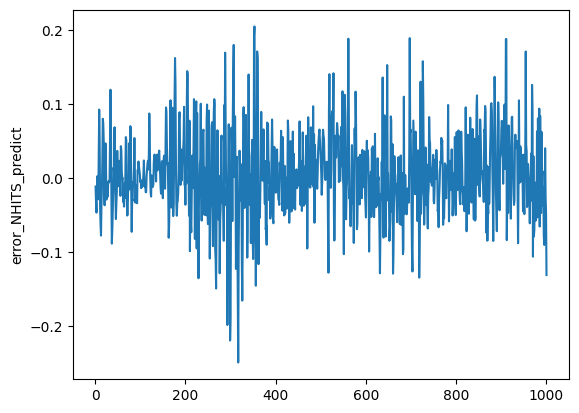

max_error 0.20514992720030878
min_error -0.24906971589914872
sd_error 0.05637425762200557
error
median 0.00031858588597222237
25_parcentile -0.03000851995801651
75_parcentile 0.037243349787569546
mae 0.04263318481412963
mse 0.003199327694571169
var_obs 0.017198726031830026
var_exp_pred 0.013249549720124027
var_error 0.003178056922432253
co_variance 0.013648758172933833
co_variance_matrix [[0.01721594 0.01364876]
 [0.01364876 0.01326281]]
[[0.19576177643420417, 0.18933781485864265, 0.16769920744622613, 0.1905211762015091, 0.17733514980956783, 0.12712681854794577, 0.15451318105428524, 0.14183430952357245, 0.18612583407086275, 0.19271884726683314, 0.06897306112707696, 0.05916806714332573, 0.14377840315828183, 0.17319338510953564, 0.18683021582256865], [0.37360408110500054, 0.38881872694185604, 0.3942283787949604, 0.39422837879495987, 0.38814252046021813, 0.378337526476467, 0.37394218434581994, 0.3560227125824126, 0.36785632601107776, 0.37461839082745785, 0.3894949334234943, 0.381042352403

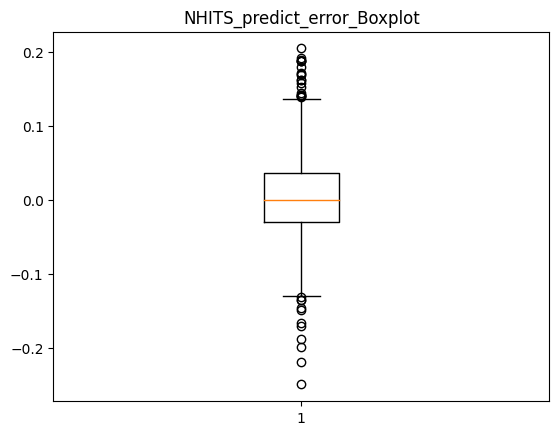

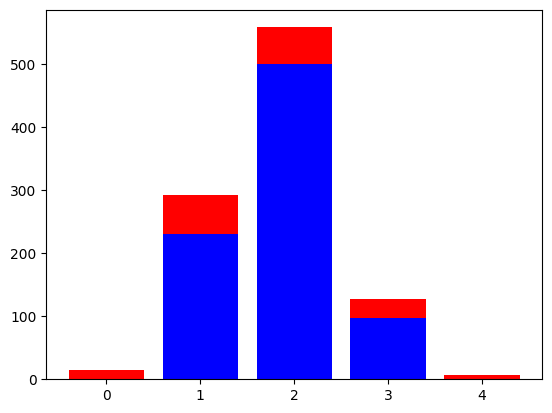

value of proportion of explained variable: 0.8152155620974159
value of correlation (skill score): 0.9041582309561621


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()


forecasts=model.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

mmodel = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
mmodel.fit(obs, np.array(exp_pred))
y_pred = mmodel.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


###########

list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
print(list_obs)
print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)



plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()









#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4344469578293568


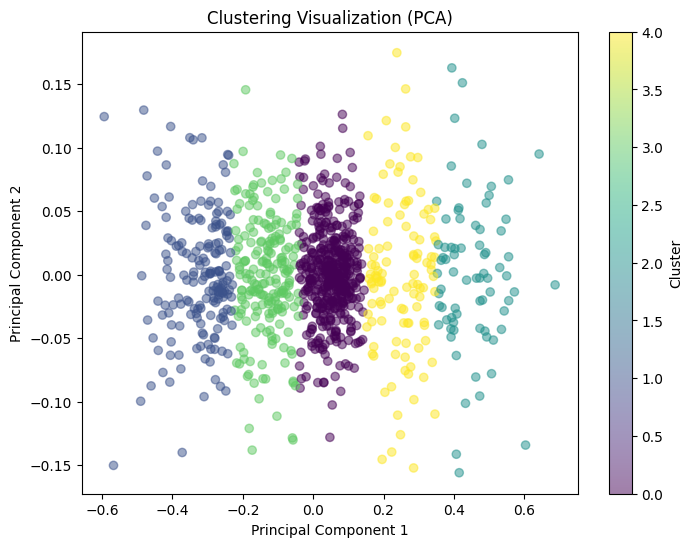

In [ ]:
X_tlist=[]
for i in range (len(X_test)):
  X_tlist.append([])
for i in range (len(X_test)):
  for j in range (3):
    X_tlist[i].append(X_test[i][j][0])

#print(X_tlist)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



X = np.array(X_tlist)
y = np.array(exp_pred)

# Reshape X to fit KMeans input format
X = X.reshape(len(X), -1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Visualize clustered data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.to_csv("norm.csv")
dataframe = pd.read_csv('/content/norm.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


train1,test1 = dataset[:-1003],dataset[-1003:]
print(len(train1), len(test1))






import numpy as np

train=[]
for i in range (len(train1)):
  train.append(train1[i][0])

test=[]
for i in range (len(test1)):
  test.append(test1[i][0])


# convert an array of values into a dataset matrix
def create_dataset(dataset):
 dataX, dataY, dataZ, dataW = [], [],[], []
 for i in range(len(dataset)-3):
   a = dataset[i:(i+2)]
   dataX.append(dataset[(i)])
   dataY.append(dataset[(i + 1)])
   dataZ.append(dataset[(i+2)])
   dataW.append(dataset[i+3])

 return np.array(dataX), np.array(dataY), np.array(dataZ), np.array(dataW)


# reshape into X=t and Y=t+1
#look_back = 1
trainX1,trainX2, trainX3, trainY = create_dataset(train)
#valX1, valX2,valX3, valY = create_dataset(test)
testX1, testX2,testX3, testY = create_dataset(test)
trainX2



trainX=[]
for i in range (len(trainX1)):
  trainX.append([trainX1[i],trainX2[i], trainX3[i]])
trainX=pd.DataFrame(trainX)
#print(trainX)



testX=[]
for i in range (len(testX1)):
  testX.append([testX1[i],testX2[i],testX3[i]])
testX=pd.DataFrame(testX)
#print(testX)


import math

from keras import models
from keras import layers
# create and fit Multilayer Perceptron model
model1 = Sequential()
model1.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model1.add(layers.Dense(32, activation='relu'))

#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='relu'))

model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(4, activation='relu'))
model1.add(layers.Dense(1))



#model.compile(loss='mean_squared_error', optimizer='adam')
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
model1.fit(trainX, trainY, epochs=10, batch_size=1024, validation_data=(testX,testY))
# Estimate model performance
trainScore = model1.evaluate(trainX, trainY)
print(trainScore)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
testScore = model1.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
# generate predictions for training
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)



# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[2:len(trainPredict)+2, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(2*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()'''

'from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\n\ndf=pd.read_csv("/content/final_output2.csv",index_col=\'Dates\',parse_dates=True)\ndf[\'norm\']=d\ndf.to_csv("norm.csv")\ndataframe = pd.read_csv(\'/content/norm.csv\', usecols=[2], engine=\'python\')\ndataset = dataframe.values\ndataset = dataset.astype(\'float32\')\n\n\ntrain1,test1 = dataset[:-1003],dataset[-1003:]\nprint(len(train1), len(test1))\n\n\n\n\n\n\nimport numpy as np\n\ntrain=[]\nfor i in range (len(train1)):\n  train.append(train1[i][0])\n\ntest=[]\nfor i in range (len(test1)):\n  test.append(test1[i][0])\n\n\n# convert an array of values into a dataset matrix\ndef create_dataset(dataset):\n dataX, dataY, dataZ, dataW = [], [],[], []\n for i in range(len(dataset)-3):\n   a = dataset[i:(i+2)]\n   dataX.append(dataset[(i)])\n   dataY.append(dataset[(i + 1)])\n   dataZ.append(dataset[(i+2)])\n   dataW.append(dataset[i+3])\n\n return np.array(dataX), np.array(dataY), np.array(data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


'''df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.to_csv("norm.csv")
dataframe = pd.read_csv('/content/norm.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


train1,val1,test1 = dataset[:-2003],dataset[-2003:-1003],dataset[-1003:]
print(len(train1),len(val1) ,len(test1))






import numpy as np

train=[]
for i in range (len(train1)):
  train.append(train1[i][0])

val=[]
for i in range (len(val1)):
  val.append(val1[i][0])


test=[]
for i in range (len(test1)):
  test.append(test1[i][0])


# convert an array of values into a dataset matrix
def create_dataset(dataset):
 dataX, dataY, dataZ, dataW = [], [],[], []
 for i in range(len(dataset)-3):
   a = dataset[i:(i+2)]
   dataX.append(dataset[(i)])
   dataY.append(dataset[(i + 1)])
   dataZ.append(dataset[(i+2)])
   dataW.append(dataset[i+3])

 return np.array(dataX), np.array(dataY), np.array(dataZ), np.array(dataW)


# reshape into X=t and Y=t+1
#look_back = 1
trainX1,trainX2, trainX3, trainY = create_dataset(train)
valX1, valX2,valX3, valY = create_dataset(val)
testX1, testX2,testX3, testY = create_dataset(test)
trainX2



trainX=[]
for i in range (len(trainX1)):
  trainX.append([trainX1[i],trainX2[i], trainX3[i]])
trainX=pd.DataFrame(trainX)
#print(trainX)


valX=[]
for i in range (len(valX1)):
  valX.append([valX1[i],valX2[i], valX3[i]])
valX=pd.DataFrame(valX)


testX=[]
for i in range (len(testX1)):
  testX.append([testX1[i],testX2[i],testX3[i]])
testX=pd.DataFrame(testX)
#print(testX)'''

d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
X, y = prep_time_series(d, lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=1000)




import math

from keras import models
from keras import layers
# create and fit Multilayer Perceptron model
model1 = Sequential()
model1.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model1.add(layers.Dense(32, activation='relu'))

#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='relu'))

model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(4, activation='relu'))
model1.add(layers.Dense(1))



#model.compile(loss='mean_squared_error', optimizer='adam')
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
model1.fit(X_train, y_train, epochs=10, batch_size=1024, validation_data=(X_test,y_test))
# Estimate model performance
trainScore = model1.evaluate(X_train, y_train)
print(trainScore)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
testScore = model1.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
# generate predictions for training
trainPredict = model1.predict(X_train)
testPredict = model1.predict(X_test)

Epoch 1/10
8/8 [==============================] - 2s 34ms/step - loss: 0.1982 - mse: 0.1982 - val_loss: 0.1500 - val_mse: 0.1500
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.1400 - mse: 0.1400 - val_loss: 0.0985 - val_mse: 0.0985
Epoch 3/10
8/8 [==============================] - 0s 24ms/step - loss: 0.0846 - mse: 0.0846 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 4/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 6/10
8/8 [==============================] - 0s 17ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 7/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 8/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0048 - mse: 0.0048 - val

32/32 [==============================] - 0s 2ms/step
[[0.5286024212837219], [0.5237129926681519], [0.5165362358093262], [0.5372236371040344], [0.5415986776351929], [0.540942907333374], [0.5408920645713806], [0.5423914790153503], [0.541620135307312], [0.5280840396881104], [0.5010023713111877], [0.49399030208587646], [0.5103530287742615], [0.532364547252655], [0.5425915718078613], [0.5523274540901184], [0.5463463068008423], [0.5321020483970642], [0.5118448734283447], [0.48839640617370605], [0.48591917753219604], [0.4910014569759369], [0.497176855802536], [0.4912273585796356], [0.4757310152053833], [0.4775916635990143], [0.48711296916007996], [0.4929598867893219], [0.49461105465888977], [0.4977283477783203], [0.5032822489738464], [0.4999328553676605], [0.5020887851715088], [0.49664735794067383], [0.4756713807582855], [0.448962539434433], [0.4359179437160492], [0.4568774700164795], [0.48290547728538513], [0.5003784894943237], [0.5060374140739441], [0.5071307420730591], [0.5032902956008911]

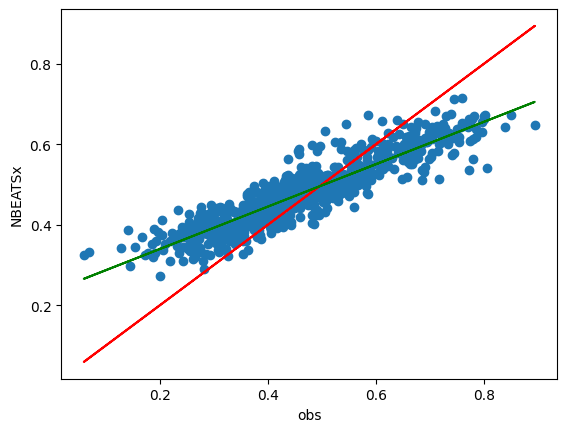

[-0.025210687177808833, -0.04362424542613941, -0.05249151848905975, -0.032142220435170676, -0.01762408267944171, -0.032480189095659084, -0.0484218841761459, 0.017317146023435037, 0.0716566305688946, 0.040539166427104534, -0.037596091313487956, -0.05711798044910221, -0.08065143617736026, -0.051877852882586284, -0.03421255702936166, -0.002838067334688388, 0.057110917335741807, 0.058081304768818565, 0.04661481406139356, -0.007262944866955889, -0.02732154203105419, 0.02847622353553758, 0.050204371439810824, 0.023968679767770174, -0.014518683982174707, -0.006572177253801437, 0.001934818584807041, -0.01943557467188095, 0.000304116581503866, -0.0030025518746266133, -0.004548818736299309, 0.0008924719188085906, 0.0524114748822313, 0.12304327683567329, 0.08685265381642948, 0.004018674516621856, -0.05466985871232766, -0.045882049081381826, -0.034730584408512066, -0.011509817105650466, 0.013082888959834338, 0.0030188100119222794, 0.06916573438928819, 0.004248721230657337, -0.01668451038420571, -0

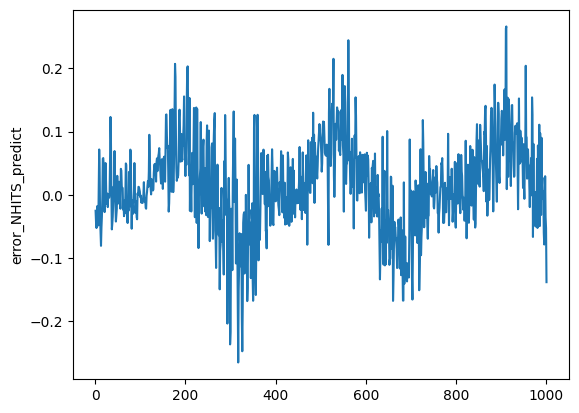

max_error 0.2660809789439393
min_error -0.2650391711413057
sd_error 0.070084626151261
error
median 0.012568022100806542
25_parcentile -0.025755860024873956
75_parcentile 0.05973534174923978
mae 0.054670760285605115
mse 0.0051332910473409045
var_obs 0.017198726031830026
var_exp_pred 0.005827165968449775
var_error 0.004911854822762018
co_variance 0.009066084673432319
co_variance_matrix [[0.01721594 0.00906608]
 [0.00906608 0.005833  ]]
[[0.19576177643420417, 0.18933781485864265, 0.16769920744622613, 0.1905211762015091, 0.17733514980956783, 0.12712681854794577, 0.15451318105428524, 0.14183430952357245, 0.18612583407086275, 0.19271884726683314, 0.06897306112707696, 0.05916806714332573, 0.14377840315828183, 0.17319338510953564, 0.18683021582256865], [0.37360408110500054, 0.38881872694185604, 0.3942283787949604, 0.39422837879495987, 0.38814252046021813, 0.378337526476467, 0.37394218434581994, 0.3560227125824126, 0.36785632601107776, 0.37461839082745785, 0.3894949334234943, 0.381042352403019,

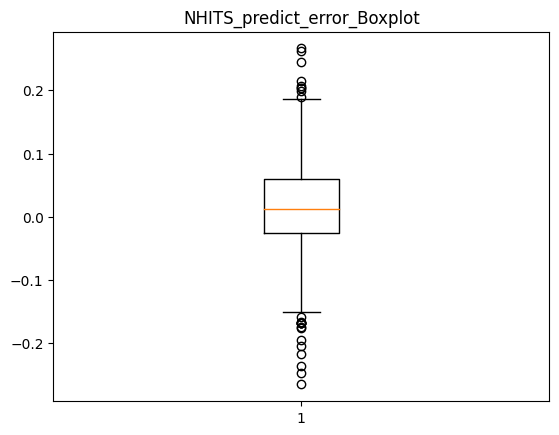

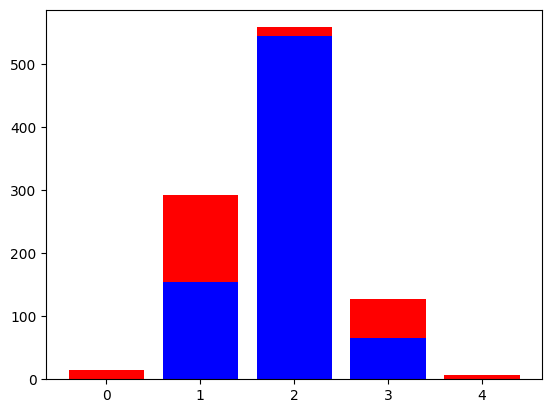

value of proportion of explained variable: 0.7144058918275952
value of correlation (skill score): 0.9056136039257805


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

forecasts=model1.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model2 = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model2.fit(obs, np.array(exp_pred))
y_pred = model2.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


#########



list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
print(list_obs)
print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)



plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()











#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4344469578293568


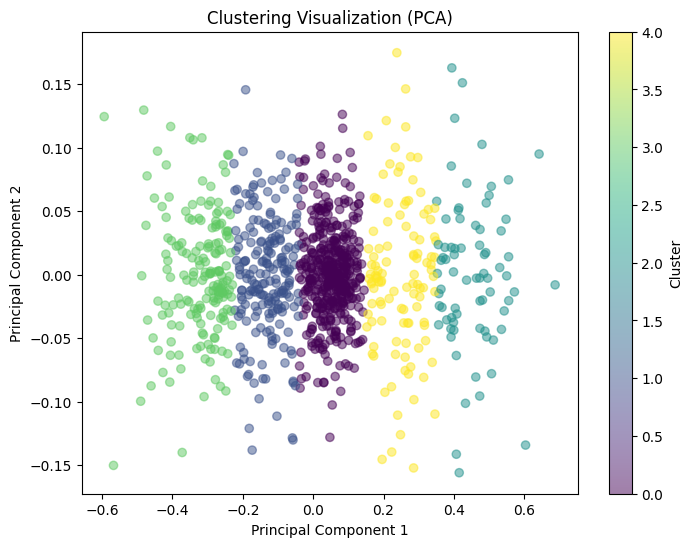

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



X = np.array(X_test)
y = np.array(exp_pred)

X = X.reshape(len(X), -1)

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)


cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Visualize clustered data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


NBEATS=mae 0.03876152764760315

mse 0.002878385350585057


LSTM=mae 0.04402280603844143

mse 0.0033402479058958455


ANN=mae 0.05631696654165409

mse 0.005368631800183423

ANN=[0.0, 0.4349315068493151, 0.9749552772808586, 0.5984251968503937, 0.0]

LSTM=[0.0, 0.791095890410959, 0.9069767441860465, 0.7007874015748031, 0.0]

NBEATS=[0.3333333333333333, 0.8184931506849316, 0.8908765652951699, 0.8188976377952756, 0.42857142857142855]

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



X = np.array(testX)
y = np.array(obs)

# Reshape X to fit KMeans input format
X = X.reshape(len(X), -1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Visualize clustered data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
